<a href="https://colab.research.google.com/github/dzhamalovas/ML/blob/main/%D0%94%D0%B6%D0%B0%D0%BC%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0_11_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Оптимизация: поиск весов

Уравнение линии с [прошлого занятия](https://www.dmitrymakarov.ru/intro/relationship-10/) (найдено с помощью функции polyfit):

$$ y = 26{,}86x - 10{,}57 $$

### Создание модели с помощью библиотеки Scikit-learn

In [ ]:
# вновь возьмем данные роста и обхвата шеи
# только теперь запишем рост в переменную X, а обхват шеи в переменную y
X = [1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78]
y = [29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5]

In [ ]:
# импортируем библиотеку Numpy
import numpy as np

# преобразуем наш список X сначала в одномерный массив Numpy, а затем добавим второе измерение
X = np.array(X).reshape(-1, 1)

# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)

In [ ]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
# т.е. найдем те самые веса или наклон и сдвиг прямой с помощью функции потерь
model.fit(X, y)

LinearRegression()

In [ ]:
# выведем наклон и сдвиг с помощью атрибутов coef_ и intercept_ соответственно
print(model.coef_, model.intercept_)

[26.86181201] -10.570936299787334


Новое уравнение, найдено с помощью библиотеки Scikit-learn:

$$ y = 26{,}86x - 10{,}57 $$

In [ ]:
# на основе значений роста (Х) предскажем значения обхвата шеи
y_pred = model.predict(X)

# выведем первые пять значений, с помощью диапазоне индексов
print(y_pred[:5])

[29.18454547 29.45316359 29.45316359 29.72178171 29.99039983]


In [ ]:
# импортируем модуль метрик, то есть измерений качества моделей
from sklearn import metrics
# выведем ту самую среднюю сумму расстояний или, говоря более корректно,
# среднеквадратическую ошибку
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))

Mean Squared Error (MSE): 0.2273395626677337


In [ ]:
# избавимся от квадрата в вычислениях, возьмем квадратный корень из нашей метрики
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Root Mean Squared Error (RMSE): 0.47680138702371


In [ ]:
# сравним RMSE со средним обхватом шеи: модель неплохо обучилась!!!
y.mean()

33.102439024390236

### Упражнения


Воспользуемся данными из упражнения прошлого занятия

In [ ]:
# напомню, что это данные зависимости спроса в экономике от цены на товары
prices = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
demand = [180, 170, 150, 140, 135, 128, 120, 115, 114, 108, 100, 97, 96, 95, 90, 85, 80, 80, 80]

**Задание 1**. Постройте модель линейной регрессии с помощью библиотеки sklearn. Какие коэффициенты вы получили?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Данные
prices = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]).reshape(-1, 1)
demand = np.array([180, 170, 150, 140, 135, 128, 120, 115, 114, 108, 100, 97, 96, 95, 90, 85, 80, 80, 80])

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(prices, demand)

# Коэффициенты
slope = model.coef_[0]  # Наклон
intercept = model.intercept_  # Сдвиг

print(f"Наклон (slope): {slope}")
print(f"Сдвиг (intercept): {intercept}")


Наклон (slope): -0.5121052631578946
Сдвиг (intercept): 165.05263157894734


**Задание 2**. Сделайте прогноз и выведите первые три прогнозных значения.

In [ ]:
# Прогнозирование спроса для всех цен
predicted_demand = model.predict(prices)

# Вывод первых трех прогнозных значений
print("Первые три прогнозных значения спроса:", predicted_demand[:3])


Первые три прогнозных значения спроса: [159.93157895 154.81052632 149.68947368]


**Задание 3**. Посчитайте квадрат средней суммы расстояний (среднеквадратическую ошибку, RMSE).

In [ ]:
from sklearn.metrics import mean_squared_error

# Расчет RMSE
rmse = np.sqrt(mean_squared_error(demand, predicted_demand))
print(f"Среднеквадратическая ошибка (RMSE): {rmse}")

Среднеквадратическая ошибка (RMSE): 8.208383661042522


### Дополнительный материал

График функций потерь MAE и MSE, использованный в ответе на [вопрос в комментариях](https://www.dmitrymakarov.ru/intro/optimization-11/#comment-76).

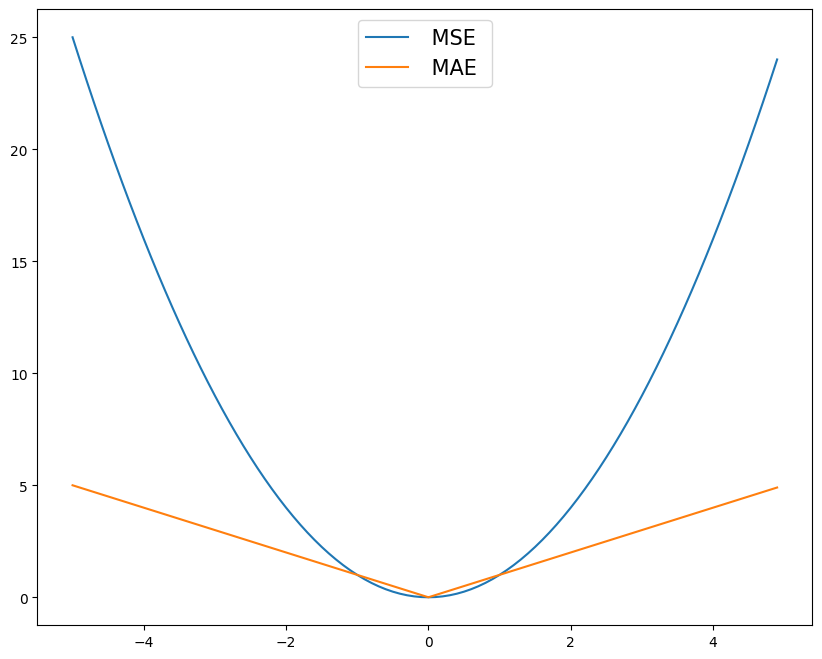

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
x_min, x_max = -5.0, 5.0
x = np.arange(x_min, x_max, 0.1)
y = x ** 2.0
z = np.abs(x)

plt.plot(x, y, label = ' MSE ')
plt.plot(x, z, label = ' MAE ')
plt.legend(loc = 'upper center', prop = {'size': 15})
plt.show()